<a href="https://colab.research.google.com/github/Hasniya1044/codtech-task2/blob/main/input.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 28ms/step - accuracy: 0.9090 - loss: 0.3066 - val_accuracy: 0.9862 - val_loss: 0.0429
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - accuracy: 0.9860 - loss: 0.0445 - val_accuracy: 0.9840 - val_loss: 0.0491
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 30ms/step - accuracy: 0.9914 - loss: 0.0280 - val_accuracy: 0.9878 - val_loss: 0.0340
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 27ms/step - accuracy: 0.9939 - loss: 0.0186 - val_accuracy: 0.9892 - val_loss: 0.0336
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.9953 - loss: 0.0146 - val_accuracy: 0.9912 - val_loss: 0.0275
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9884 - loss: 0.0351

Test Accuracy: 0.9911999702453613


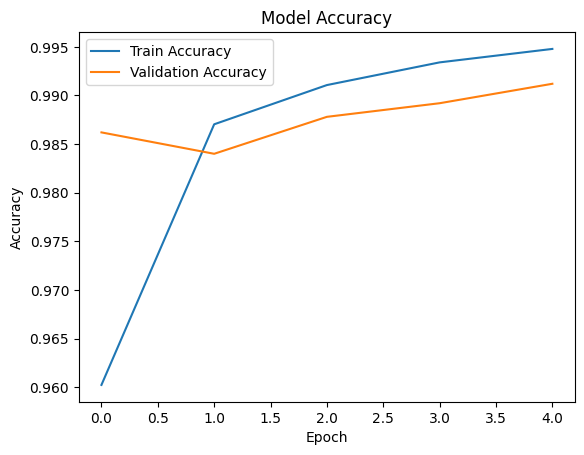

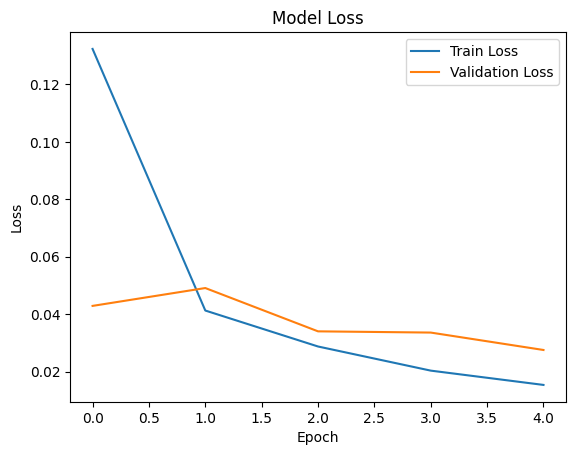

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


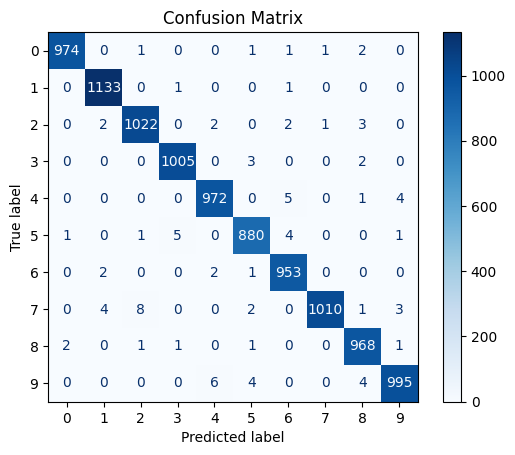

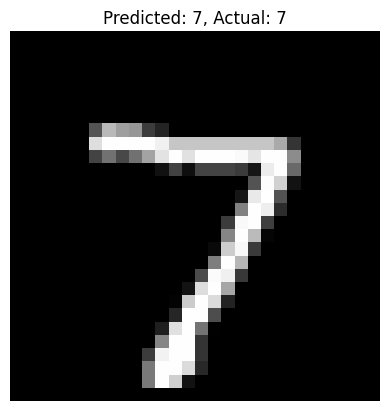

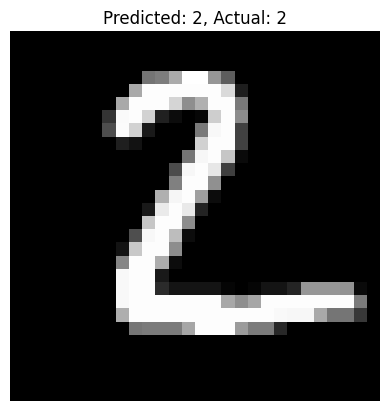

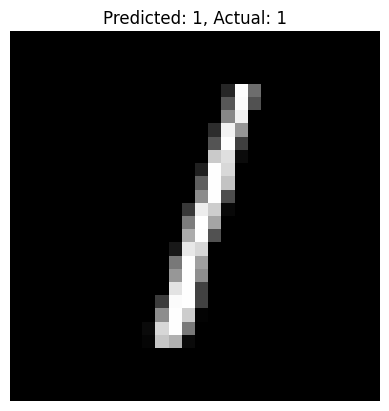

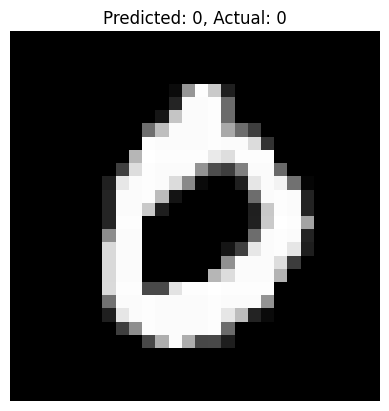

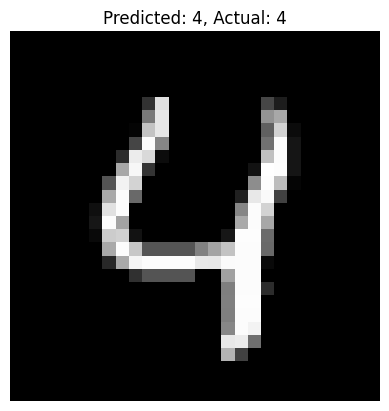

In [1]:
# 1. Import libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 2. Load MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 3. Normalize and reshape
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# 4. Build the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 5. Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 6. Train the model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# 7. Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print("\nTest Accuracy:", test_acc)

# 8. Plot accuracy & loss curves
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# 9. Confusion matrix
y_pred = np.argmax(model.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# 10. Sample Predictions
for i in range(5):
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Predicted: {y_pred[i]}, Actual: {y_test[i]}")
    plt.axis('off')
    plt.show()
